**Aprendizaje Automático** - 2024
# Clase 4: Regresión

Contenidos:
* Introducción a Scikit-Learn
* Regresión lineal con Scikit-Learn
* Modelos lineales con regularización
* Tratamiento de variables categóricas y escalas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Fuentes:*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
* https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_introduction.html
* https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb


# Introducción a Scikit-Learn

Scikit-learn es una librería de aprendizaje automático de código abierto para el lenguaje de programación Python. Proporciona herramientas simples y eficientes para el análisis de datos y la minería de datos, así como para la construcción de modelos de aprendizaje automático. Scikit-learn es una de las bibliotecas más populares para el aprendizaje automático en Python y se utiliza ampliamente en la industria y la academia. Admite librerías numéricas y científicas de Python como NumPy y SciPy, o Pandas.

![fig_sckl](https://ulhpc-tutorials.readthedocs.io/en/latest/python/advanced/scikit-learn/images/scikit.png)
*Image Source: ulhpc-tutorials.readthedocs.io*

## Ajustar un modelo y hacer predicciones

La librería esta compuesta por modulos que nos otorgan distintas herramientas desde `model_selection` que nos brinda herramientas necesarias para la manipular las particiones de los datos o `metrics` para las métricas. Por otro lado tendremos distintos módulos para cada modelo como por ejemplo `neighbors` donde encontraremos modelos que funcionan a partir de distancias como `KNN`

Debemos primero importar el modelo e instanciarlo:

```
from sklearn.MODULO import MODELO

% instanciamos el modelo definiendo sus hiperparametros
modelo = MODELO()
```

El método `fit` se llama para entrenar el modelo a partir de los datos de entrada (features o características) y la etiqueta que queremos predecir o el objetivo (target).

```
modelo.fit(data, target)
```

El aprendizaje se puede representar de la siguiente manera:

![imagen.png](https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.fit.svg)

El método fit se compone de dos elementos:
- un algoritmo de aprendizaje
- algun estado del modelo (los parametros por ejemplo)

El algoritmo de aprendizaje toma los datos de entrenamiento y el objetivo de entrenamiento como entrada y establece los estados del modelo. Estos estados del modelo se utilizarán más adelante para predecir (para clasificadores y regresores) o transformar datos (para transformadores).Tanto el algoritmo de aprendizaje como el tipo de estados del modelo son específicos para cada tipo de modelo y a veces podremos modificarlas.


Usemos nuestro modelo para hacer algunas predicciones utilizando el mismo conjunto de datos y usando el método `predict`.
```
target_predicted = model.predict(data)
```
Podemos ilustrar el mecanismo de predicción de la siguiente manera:

![](
https://inria.github.io/scikit-learn-mooc/_images/api_diagram-predictor.predict.svg)

Para predecir, un modelo utiliza una función de predicción que utilizará los datos de entrada junto con los estados del modelo. Al igual que con el algoritmo de aprendizaje y los estados del modelo, la función de predicción es específica para cada tipo de modelo.

# Regresion lineal multiple


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Referencias / Material suplementario

- Cap. 3 Linear Methods for Regressiondel del libro [The Elements of Statistical Learning](https://hastie.su.domains/Papers/ESLII.pdf)

- Cap. 6 Linear Model Selection and Regularization del libro [An Introduction to Statistical Learning](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf)

## Ejemplo: el dataset de diabetes

Vamos a utilizar un conjunto de datos muy popular sobre diabetes. El dataset "diabetes" contiene un total de 442 observaciones y 10 variables (características) numéricas. Las variables del dataset "diabetes" son las siguientes:

    Edad: Edad del paciente en años.
    Sexo: Sexo del paciente (0 = Femenino, 1 = Masculino).
    Índice de masa corporal (IMC): Medida del peso en relación con la altura del paciente.
    Presión arterial media (MAP): Medida de la presión arterial promedio del paciente.
    Tasa de s1 de serología del suero: Un indicador del nivel de s1 de serología del suero del paciente.
    Tasa de s2 de serología del suero: Un indicador del nivel de s2 de serología del suero del paciente.
    Tasa de s3 de serología del suero: Un indicador del nivel de s3 de serología del suero del paciente.
    Tasa de s4 de serología del suero: Un indicador del nivel de s4 de serología del suero del paciente.
    Tasa de s5 de serología del suero: Un indicador del nivel de s5 de serología del suero del paciente.
    Tasa de s6 de serología del suero: Un indicador del nivel de s6 de serología del suero del paciente.

El target o variable de salida en el dataset es la *progresión de la diabetes* en un año. Esta variable representa la medida de la progresión de la enfermedad en un año para cada paciente en el estudio. Es un valor numérico continuo que indica la magnitud de la progresión de la diabetes en un año, y se utiliza como la variable objetivo en los modelos de regresión construidos con este dataset.

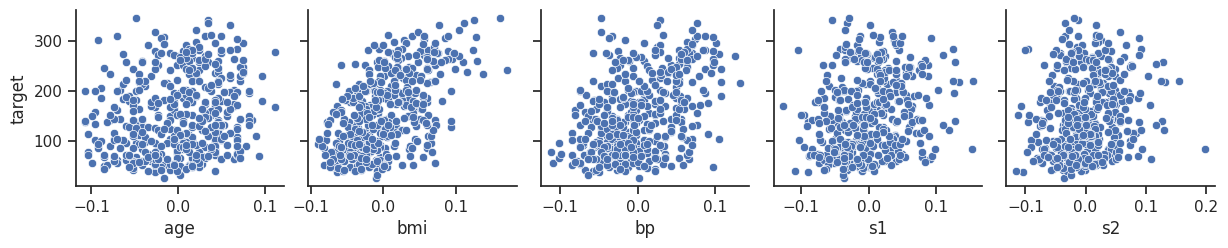

In [3]:
diabetes_data = load_diabetes()
diabetes = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
diabetes['target'] = diabetes_data['target']

# Visualización de algunas variables utilizando Seaborn
sns.set(style='ticks')
sns.pairplot(diabetes, x_vars=['age', 'bmi', 'bp', 's1', 's2'], y_vars='target', kind='scatter')
plt.show()

---
### Ejercicio 1

Observe la distribución de las features, ¿nota algo en particular? ¿Qué tan correlacionadas estan los features? Realizar gráficos para analizar estas preguntas.

**Rta**: A simple vista la variable bmi y bp pueden ser buenas predictoras de la variable target.

In [4]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


---

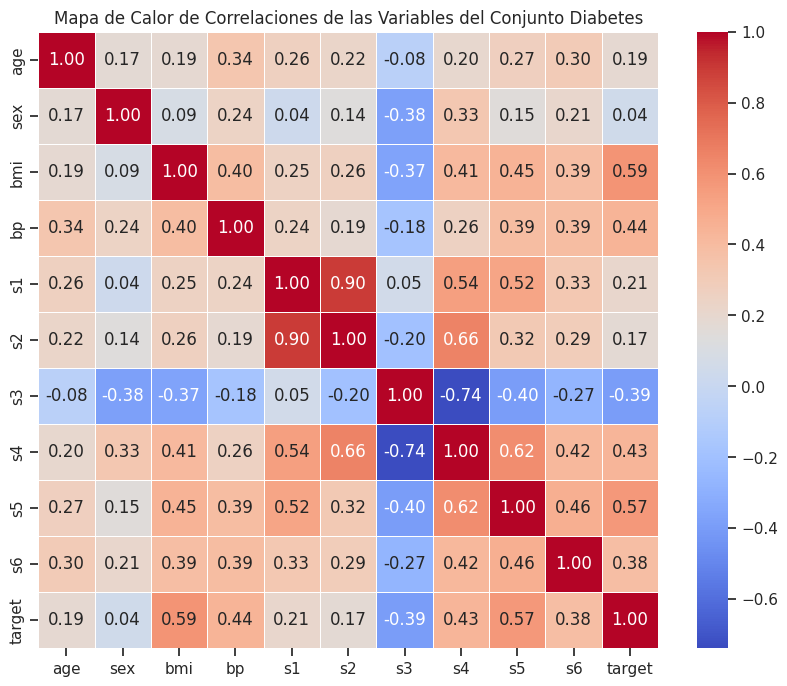

In [5]:
correlation_matrix = diabetes.corr()

# Graficar el mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones de las Variables del Conjunto Diabetes')
plt.show()

### Entrenamos un modelo lineal: split
Para el desarrollo de nuestro modelo vamos a necesitar realizar una separación de datos, para eso usaremos un split de `train`, `val` y `test`. **El test no lo utilizaremos hasta tener el mejor de todos los modelos**:

![image.png](https://cdn.shortpixel.ai/spai/q_lossy+w_730+to_webp+ret_img/https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

Creemos nuestra matriz de features `X` y nuestro vector de targets `y`.

In [6]:
X = diabetes.drop('target', axis=1)
y = diabetes['target']

#### Ejercicio 2

Utilizar la función [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para crear los tres conjuntos pedidos, utilizar el 70% para train, 15% para validation y 15% para test. Fijar la semilla aleatoria en 20.

In [7]:
# Separación del dataset en train, dev y test
# COMPLETAR
seed = 20
np.random.seed(seed)

#regla
#validation_size = desired_validation_size / (1 - test_size)

# Primero, dividir en conjunto de entrenamiento + validación y conjunto de prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)

# Luego, dividir el conjunto de entrenamiento + validación en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=seed)

¿Cómo quedaron las relaciones finales de train, validation y test?

In [8]:
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (308, 10)
Tamaño del conjunto de validación: (67, 10)
Tamaño del conjunto de prueba: (67, 10)


Instanciemos nuestro primer modelo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), entrenémoslo y evaluémoslo en el conjunto de validación:

In [9]:
# Creación y entrenamiento del modelo de regresión lineal
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_clasica = reg_linear.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_clasica = mean_squared_error(y_val, y_val_pred_clasica)

print("Error cuadrático medio (Clásica):", mse_clasica)

Error cuadrático medio (Clásica): 3699.222668881333


### Interpretación de los $\beta$
Si tenemos en general a los **features normalizados** con media 0 y varianza 1, y son independientes entre si (o en su defecto poco correlacionados), los $\beta$ **se pueden interpretar de alguna manera como un proxy de importancia** y entender el aporte de las variables al target. Esto quiere decir que el valor del coeficiente me dice cuanto aporta la variación en el feature correspondiente al cambio en el target. Por ejemplo, si el coeficiente $\beta_j$ es negativo, aumentar el feature $x_j$ correspondiente impacta disminuyendo el valor del target.

---
#### Ejercicio 3

Ver como acceder a los valores de los coeficientes de la regresión lineal, ¿que variable parece ser las importante? Ordenarlas por valor absoluto y mostrarlas en un `barplot`.

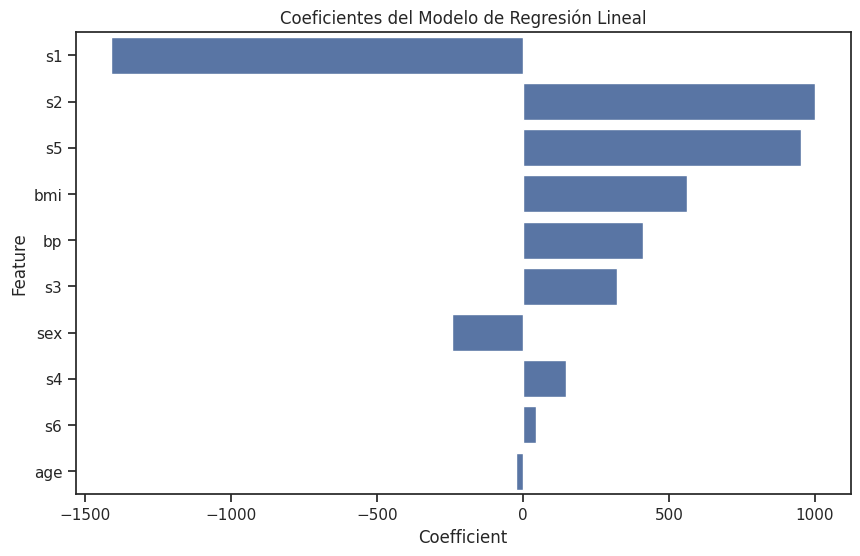

In [10]:
coefs = reg_linear.coef_

# Obtener los nombres de las características
features = diabetes_data.feature_names

# Crear un DataFrame para ordenar y visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

# Ordenar por el valor absoluto de los coeficientes
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Coeficientes del Modelo de Regresión Lineal')
plt.show()

---

# Regresión lineal con regularización

Una de las formas estandar de regularizar un modelo es mediante la penalizacion de los valores de los parametros de nuestro modelo. En regresion lineal existen dos maneras muy usuales de hacer: penalización **Ridge** o **Lasso**. La principal diferencia entre estas técnicas es cómo tratan los coeficientes del modelo. *Ridge tiende a reducir todos los coeficientes*, mientras que *Lasso tiene el efecto de reducir algunos coeficientes a cero*, eliminando así algunos predictores del modelo.

Estos metodos introducen un nuevo hiperparámetro (en general representados con la letra $\lambda$ o en el caso de regresion lineal se suele utilizar $\alpha$) que modula que tanto queremos penalizar el modelo. **Valores altos de este hiperparámetro penalizaran fuertemente el modelo tendiendo a reducir fuertemente la varianza del modelo.** De esta manera, cuando le imponemos penalizaciones al modelo lo volvemos **menos flexible**, es decir, menos suceptible a acomodarse más a los datos en los que se ajusta. Esto hace que el modelo sea menos sensible al ruido de los datos y a los valores particulares usados para su entrenamiento, haciendo que se **reduzca la posibilidad de sobreajuste** a esos datos, y logrando un mejor balance de la varianza que podría hacer que el modelo **generalice mejor** a datos nuevos.

## Regularización Ridge ($L^2$)

La penalización utilizada por el modelo Ridge queda de la siguiente manera:

\begin{equation}
\cal L(\beta, \alpha) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2 + \alpha \sum_{j=1}^{p} {\beta_j}^2
\end{equation}

donde:

- $y$ es la variable de respuesta
- $\beta_0$ es el intercept
- $x_j$ es la $j$-ésima variable predictora/feature
- $\beta_j$ es el coeficiente correspondiente a la $j$-ésima variable predictora
- $\alpha$ es el **hiperparámetro** de regularización que controla la fuerza de la penalización de la magnitud de los coeficientes.

*Nota*: La última parte de la ecuación, $\sum_{j=1}^{p} \beta_j^2$, es la función de penalización $L^2$ regulada por $\alpha>0$ que penaliza más fuertemente a los coeficientes más grandes.

### Ejercicio 4.1

Instanciar una [Regresion Lineal Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) con un valor de regularización igual a 0.1, entrenarlo y reportar el error cuadrático medio en el conjunto de validación.

In [11]:
# Instanciar el modelo Ridge con alpha (valor de regularización) = 0.1
ridge_model = Ridge(alpha=0.1)

# Entrenar el modelo con el conjunto de entrenamiento
ridge_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred_ridge = ridge_model.predict(X_val)

# Calcular el error cuadrático medio (MSE) en el conjunto de validación
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

# Imprimir el error cuadrático medio
print("Error cuadrático medio (Ridge):", mse_ridge)

Error cuadrático medio (Ridge): 3476.019594572388


## Regularización Lasso ($L^1$)

La penalización utilizada por el modelo Lasso queda de la siguiente manera:

\begin{equation}
\cal L(\beta, \alpha) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2 + \alpha \sum_{j=1}^{p} |\beta_j|
\end{equation}

*Nota*: La última parte de la ecuación, $\sum_{j=1}^{p} |\beta_j|$, es la función de penalización $L^1$ regulada por $\alpha>0$ que obliga a algunos coeficientes a ser exactamente cero, lo que conduce a una selección de features integrada.

### Ejercicio 4.2

Instanciar una [Regresion Lineal Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) con un valor de regularización igual a 0.1, entrenarlo y reportar el error cuadrático medio en el conjunto de validación. ¿Obtuvieron los mismo resultados? ¿Lasso eliminó alguna features ($\beta=0$)?

In [12]:
# Instanciar el modelo Lasso con alpha (valor de regularización) = 0.1
lasso_model = Lasso(alpha=0.1)

# Entrenar el modelo con el conjunto de entrenamiento
lasso_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
y_val_pred_lasso = lasso_model.predict(X_val)

# Calcular el error cuadrático medio (MSE) en el conjunto de validación
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)

# Imprimir el error cuadrático medio
print("Error cuadrático medio (Lasso):", mse_lasso)



Error cuadrático medio (Lasso): 3472.606573403372


In [13]:
# Comparemos los resultados obtenidos hasta aca en val
print("Error cuadrático medio (Lasso):", mse_lasso)
print("Error cuadrático medio (Ridge):", mse_ridge)
print("Error cuadrático medio (Clásica):", mse_clasica)

Error cuadrático medio (Lasso): 3472.606573403372
Error cuadrático medio (Ridge): 3476.019594572388
Error cuadrático medio (Clásica): 3699.222668881333


## Efecto del $\alpha$

Queremos entender como afecta el hiperparámetro de regularización a los valores de los **parámetros** a medida que aumentamos el $\alpha$ para cada tipo de regularización vista.

### Ejercicio 5

Grafiquen en dos plots separados los coeficientes (betas) para los modelos de regresión Ridge y Lasso, variando el parámetro de regularización alpha en un rango logarítmico entre 3 y -3 con 100 puntos. Los gráficos deben mostrar cómo los coeficientes de las características cambian en función de alpha para ambos modelos.

¿Qué conclusiones pueden sacar? ¿Qué observa? Relacionelo con el dilema sesgo-varianza y el rol de la regularización en ese trade-off, ¿que sucede con alfas muy altos y que sucede con alfas muy bajos?

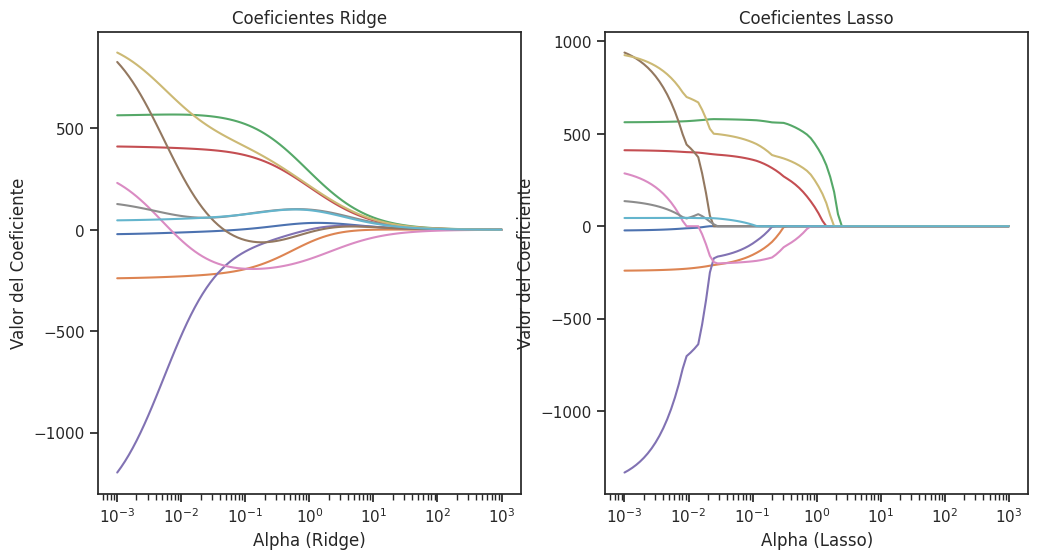

In [14]:
# COMPLETAR

alphas = np.logspace(-3, 3, 100)

# Arrays para almacenar los coeficientes para cada alpha
ridge_coefs = []
lasso_coefs = []

# Fittear y entrenar un modelo Lasso y un modelo Ridge, graficar los coeficientes (betas) para alpha en alphas
for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Convertir las listas a arrays
ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

# Crear las subplots para los dos modelos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Personalizar y mostrar gráficos para Ridge
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha (Ridge)')
axes[0].set_ylabel('Valor del Coeficiente')
axes[0].set_title('Coeficientes Ridge')
for coef in ridge_coefs.T:  # Transponemos para graficar cada coeficiente por separado
    axes[0].plot(alphas, coef)

# Personalizar y mostrar gráficos para Lasso
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha (Lasso)')
axes[1].set_ylabel('Valor del Coeficiente')
axes[1].set_title('Coeficientes Lasso')
for coef in lasso_coefs.T:
    axes[1].plot(alphas, coef)

# Mostrar el gráfico final
plt.show()


## Eligiendo $\alpha$ con Cross Validation

Scikit-learn nos permite elegir el valor de alfa para Ridge y Lasso utilizando cross-validation con los metodos: [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) y [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Estos metodos lo que hacen es dado un conjunto de alfas y una cantidad de folds (ver documentacion parametro `cv`) elegir el mejor de los alfas y con dicho alfa ajustar el modelo de nuevo a todos los datos. Veamoslo con un ejemplo:



In [15]:
alphas = np.logspace(-10, 3, 100)

reg_ridgeCV = RidgeCV(alphas=alphas, cv=5)
reg_lassoCV = LassoCV(alphas=alphas, cv=5)

reg_ridgeCV.fit(X_train, y_train);
reg_lassoCV.fit(X_train, y_train);

In [16]:
# Predicciones en el conjunto de validación para Lasso
y_val_pred_ridgeCV = reg_ridgeCV.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_ridgeCV = mean_squared_error(y_val, y_val_pred_ridgeCV)

print("Mejor alfa encontrado:", reg_ridgeCV.alpha_)
print("Error cuadrático medio (RidgeCV):", mse_ridgeCV)

Mejor alfa encontrado: 0.0012328467394420685
Error cuadrático medio (RidgeCV): 3654.521474911697


In [17]:
# Predicciones en el conjunto de validación para Lasso
y_val_pred_lassoCV = reg_lassoCV.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_lassoCV = mean_squared_error(y_val, y_val_pred_lassoCV)

print("Mejor alfa encontrado:", reg_lassoCV.alpha_)
print("Error cuadrático medio (LassoCV):", mse_lassoCV)

Mejor alfa encontrado: 0.06280291441834272
Error cuadrático medio (LassoCV): 3503.1893445519368


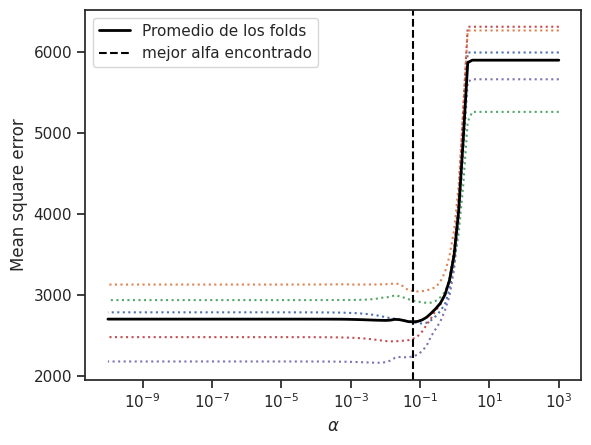

In [18]:
# Podemos visualizar los errores que tuvo en cada fold accediendo al atributo mse_path_
# OJO: si quieren graficar el de Ridge en vez de acceder a los alfas mediante MODELO.alphas_, se llaman MODELO.alphas
plt.semilogx(reg_lassoCV.alphas_, reg_lassoCV.mse_path_, linestyle=":")
plt.plot(
    reg_lassoCV.alphas_,
    reg_lassoCV.mse_path_.mean(axis=-1),
    color="black",
    label="Promedio de los folds",
    linewidth=2,
)

plt.axvline(reg_lassoCV.alpha_, linestyle="--", color="black", label="mejor alfa encontrado")
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.show()

---
# Ejercicio Integrador

## ElasticNet

[ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) es un modelo que no veremos en detalle pero lo que hace es combinar los dos tipos de regularización, utilizando un hiperparámetro nuevo $\rho$ que regula que tanto peso le da a cada una de las regularizaciones.

\begin{equation}
\cal L(\beta) = \sum_{i=1}^{n}(y_i - \beta_0 - \sum_{j=1}^{p}x_{ij}\beta_j)^2 + \alpha(\rho\sum_{j=1}^{p}|\beta_j| + \frac{1-\rho}{2}\sum_{j=1}^{p}\beta_j^2)
\end{equation}

En criollo..

alpha: controla la penalización total.
ρ determina la mezcla entre L1 y L2

- ρ = 1: Lasso puro.

- ρ = 0: Ridge puro.

- ρ = 0.5: mezcla 50/50.


1 - Cree una celda de código para ajustar un modelo de Elastic Net utilizando $\alpha=0.1$ y $\rho=0.5$ en el conjunto de datos de diabetes siguiendo la partición dada en la notebook, si es necesario recurra a la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).


In [20]:
# Instanciar el modelo Elastic Net con alpha=0.1 y l1_ratio=0.5
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
# entreno
elastic_net_model.fit(X_train, y_train)

# Predigo para validacion
y_val_pred_en = elastic_net_model.predict(X_val)

# Calcular el error cuadrático medio (MSE)
mse_en = mean_squared_error(y_val, y_val_pred_en)
print("Error cuadrático medio (Elastic Net, alpha=0.1, l1_ratio=0.5):", mse_en)

Error cuadrático medio (Elastic Net, alpha=0.1, l1_ratio=0.5): 5536.480822772122


2 - Elija ambos hiperparámetros de ElasticNet usando Validación Cruzada en el conjunto `X_train`. Defina una grilla para eso que tenga al menos 10 puntos espaciados logaritmicamente para cada hiperparámetro. Utilice la función provista por sklearn: [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV)


In [25]:
# Defino grilla

alpha_grid = np.logspace(-4, 1, 20)
l1_ratio_grid = np.linspace(0.1, 1.0, 20)

elastic_net_cv = ElasticNetCV(alphas=alpha_grid,
                              l1_ratio=l1_ratio_grid,
                              cv=5,
                              random_state=42)

# Ajustar el modelo sobre X_train
elastic_net_cv.fit(X_train, y_train)
print("Mejor alpha encontrado:", elastic_net_cv.alpha_)
print("Mejor l1_ratio encontrado:", elastic_net_cv.l1_ratio_)

# Evaluar el modelo
y_val_pred_cv = elastic_net_cv.predict(X_val)
mse_cv = mean_squared_error(y_val, y_val_pred_cv)
print("Error cuadrático medio (ElasticNetCV):", mse_cv)

Mejor alpha encontrado: 0.07847599703514607
Mejor l1_ratio encontrado: 1.0
Error cuadrático medio (ElasticNetCV): 3489.074016935546



3 - Compare los 4 mejores modelos (Ridge, Lasso, ElasticNet y sin regularizar) en el conjunto de `test`. ¿Cuál fue el mejor modelo? Para el mejor modelo, ¿cuál fue la variable que tiene un mayor efecto positivo en el aumento de la glucosa?

In [28]:
## Predigo en test para los 4 modelos creados

y_test_pred_linear = reg_linear.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)
y_test_pred_lasso = lasso_model.predict(X_test)

#mejor modelo encontrado para Elastic net
elastic_net_model = ElasticNet(alpha=0.078, l1_ratio=1)
elastic_net_model.fit(X_train, y_train)
y_test_pred_en = elastic_net_model.predict(X_test)

# Calcular el MSE para cada modelo
mse_linear_test = mean_squared_error(y_test, y_test_pred_linear)
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
mse_en_test = mean_squared_error(y_test, y_test_pred_en)


# Mostrar los resultados
print("Error cuadrático medio en test (Sin regularizar):", mse_linear_test)
print("Error cuadrático medio en test (Ridge):", mse_ridge_test)
print("Error cuadrático medio en test (Lasso):", mse_lasso_test)
print("Error cuadrático medio en test (ElasticNetCV):", mse_en_test)




Error cuadrático medio en test (Sin regularizar): 3983.0760282904907
Error cuadrático medio en test (Ridge): 3816.4898523331826
Error cuadrático medio en test (Lasso): 3910.2266736807615
Error cuadrático medio en test (ElasticNetCV): 3896.490353917931


Para este conjunto de datos el mejor modelo lineal es el de Ridge, ya que obtengo un menor error cuadratico medio en el conjunto de test. (Hacer una grilla con solo 20 valores es muy pobre, realizar una optimizacion bayesiana con optuna seria mucho mas optimo pero no viene al caso.)
